In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("data/customer.csv")

In [3]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


# Menentukan jumlah cluster

In [4]:
from kmodes.kprototypes import KPrototypes
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

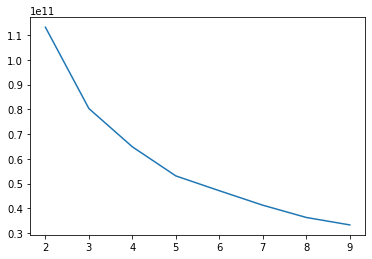

In [5]:
score = []

for k in tqdm(range(2, 10)):
    model = KPrototypes(n_clusters=k)
    model.fit_predict(df, categorical=[0, 1])
    score.append(model.cost_)
    
plt.plot(range(2, 10), score)

# Training

In [11]:
model = KPrototypes(n_clusters=3)
member = model.fit_predict(df, categorical=[0, 1])

In [12]:
df_pred = df.copy()
df_pred["cluster"] = member
df_pred.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


# Analyze cluster

In [17]:
num, cat = model.cluster_centroids_

In [18]:
df_cat = pd.DataFrame(cat, columns=df.columns[:2]) # kolom ke 0 sampai 2
df_num = pd.DataFrame(num, columns=df.columns[2:]) # kolom ke 2 sampai trakhir
df_cat.join(df_num)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,3,36156.389831,6123.644068,6366.779661,6811.118644,1050.016949,3090.050847
1,1,3,8341.612805,3779.893293,5152.173780,2577.237805,1720.573171,1136.542683
2,2,3,7751.981132,17910.509434,27037.905660,1970.943396,12104.867925,2185.735849


- analisis menggunakan rata rata

- cluster ke 0 : customer hemat(karena dibawah rata rata)
- cluster ke 1 : typical customer milk grocery dan detergen
- cluster ke 2 : typical customer suka freshfood(karena belanja freshfoodnya banyak bgt)

In [19]:
df.mean()

Channel                 1.322727
Region                  2.543182
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
dtype: float64